In [2]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=af20c4278461b6f89b2dea37951e413a0f05786df0581b6bff251196816cac6f
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

Nível de Alerta de Baixo Desempenho: 45.20583160800551


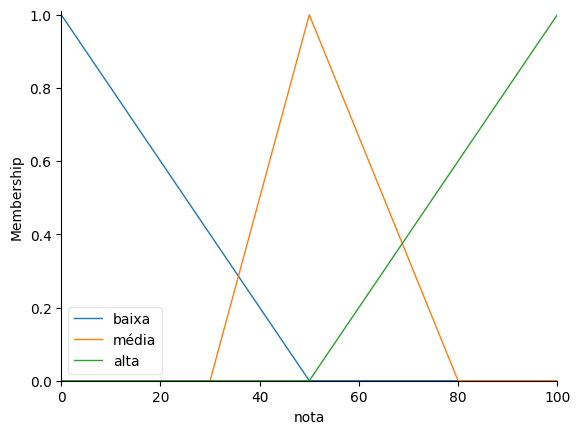

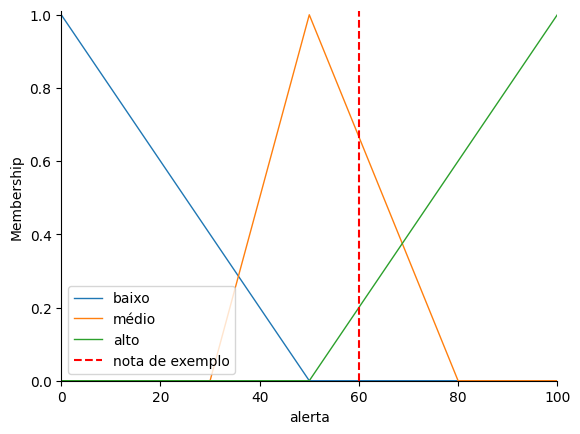

In [4]:
# Criação das variáveis de entrada e saída
nota = ctrl.Antecedent(np.arange(0, 101, 1), 'nota')
alerta = ctrl.Consequent(np.arange(0, 101, 1), 'alerta')

# Definição das funções de pertinência para a variável "nota"
nota['baixa'] = fuzz.trimf(nota.universe, [0, 0, 50])
nota['média'] = fuzz.trimf(nota.universe, [30, 50, 80])
nota['alta'] = fuzz.trimf(nota.universe, [50, 100, 100])

# Definição das funções de pertinência para a variável "alerta"
alerta['baixo'] = fuzz.trimf(alerta.universe, [0, 0, 50])
alerta['médio'] = fuzz.trimf(alerta.universe, [30, 50, 80])
alerta['alto'] = fuzz.trimf(alerta.universe, [50, 100, 100])

regra1 = ctrl.Rule(nota['baixa'], alerta['alto'])
regra2 = ctrl.Rule(nota['média'], alerta['médio'])
regra3 = ctrl.Rule(nota['alta'], alerta['baixo'])

sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

simulador = ctrl.ControlSystemSimulation(sistema_controle)

# Simulação com uma nota de exemplo (por exemplo, 60)
simulador.input['nota'] = 60

# Computar o resultado
simulador.compute()

# Obter o valor de saída (nível de alerta)
nivel_alerta = simulador.output['alerta']

# Visualizar o nível de alerta
print("Nível de Alerta de Baixo Desempenho:", nivel_alerta)

# Plotar as funções de pertinência
nota.view()
alerta.view()

plt.axvline(x=60,color='r',linestyle='--',label='nota de exemplo')
plt.legend()

plt.show()